In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import *

In [2]:
def func(x):
    return x**3 - 3 * sin(x)

def deriv1(x):
    return 3*x**2 - 3*cos(x)

In [3]:
f = np.vectorize(func)
minimum = scipy.optimize.minimize(f, 1)
minimum

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.642130412914144
        x: [ 8.241e-01]
      nit: 3
      jac: [ 1.073e-06]
 hess_inv: [[ 1.398e-01]]
     nfev: 10
     njev: 5

In [4]:
minimal_brent = scipy.optimize.brent(func, brack = (0,1), full_output = True)
print(minimal_brent, minimum['x'][0])

(0.8241323111380852, -1.6421304129142098, 10, 13) 0.8241324484434951


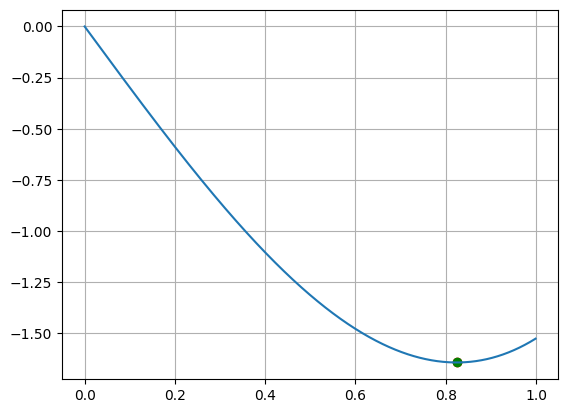

In [5]:
x = np.arange(0, 1, 0.001)
plt.plot(x, f(x))
plt.scatter(minimum['x'], minimum['fun'], color = 'red')
plt.scatter(minimal_brent[0], minimal_brent[1], color = 'green')
plt.grid(True)

3 задание

In [17]:
def porazr(fun,a,b,p = 100,eps = 10**-6):
    h = (b-a)/p
    x = a
    f0 = fun(x)
    f1 = fun(x+h)
    x+=h
    while(f1 < f0 and x < b):
#         print(f1,f0, x+h, func(x+h))
        f0 = f1
        x +=h
        f1 = fun(x)   
    
    h = eps
    f0 = f1
    x -=h
    f1 = fun(x)
#     print(f0,f1,x)
    
    while(f1 <= f0 and x >= a):
        f0 = f1
        x -= h
        f1 = fun(x)
        #print(f0,f1, x)
    else:
        return x,f1

In [24]:
def polyline_method(f, df,a,b,eps):
    minf = a
    k,m = 0, 5
    L = 0
    xxx = np.linspace(a,b, 100)
    for x in xxx:
        if abs(df(x))>L:
            L=abs(df(x))
            m+=1
    while True:
        x=(f(a)-f(b)+L*(a+b))/(2*L)
        p=(f(a)+f(b)-L*(a-b))/2
        d =(f(x)-p)/(2*L)
        x1 =x-d
        x2=x+d
        k+-1
        m += 5
        if abs(x2- x1)< eps:
            minf =f(x)
            break
        elif(f(x1)<f(x2)):
            a=x
        else:
            b=x
    return x,k,m

In [25]:
porazr(func,0,1,500)

(0.8241309999999469, -1.6421304129080565)

In [26]:
polyline_method(func, deriv1, 0,1,10**-6)

(0.8241326313027102, 0, 101)